<a href="https://colab.research.google.com/github/McPatrik/Data-analyst-Projects/blob/main/arkham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Немного введения.
Я являюсь поклонницей серии игр "Аркхэм" в различных редакциях. В сердце игровой механики лежит кубик шестигранник с помощью которого осуществляется проверка навыков от успеха которой зависят дальнейшие события, произошедшие с вашим персонажем, так и непосредственно сам бой с различными существами.

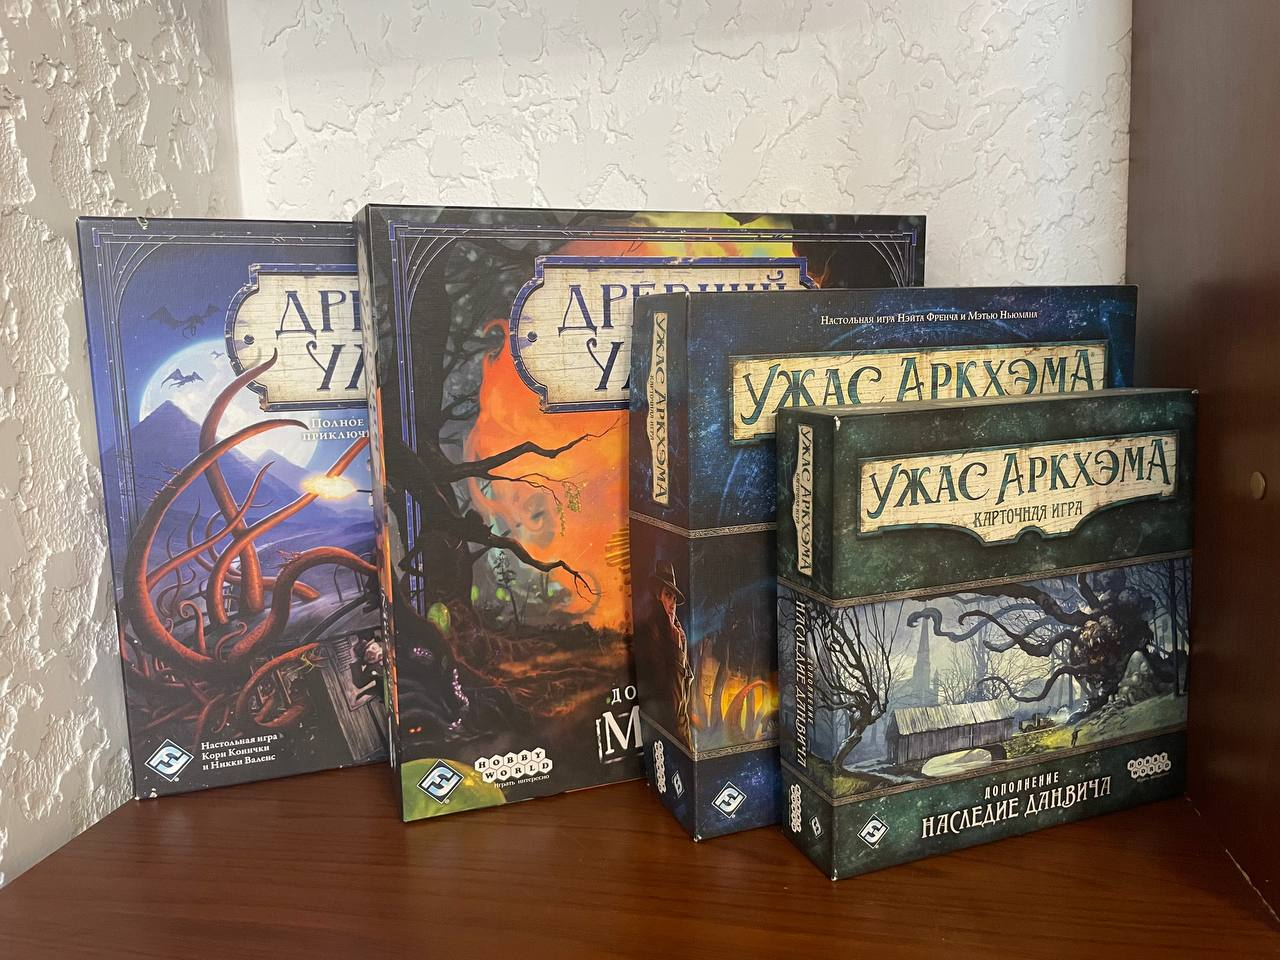

# Проверки

Как же происходит эта ваша проверка? Да, очень просто! Нуу.. не всегда.

- Каждый персонаж обладает разными значениями характеристик(знания, общение, внимание, сила и воля). Это значение показывает каким количеством кубиков вы обладаете для проверки

- Что такое пройденная проверка? При классической проверке на тот или иной навык вне боя, это выпадение хотя бы на одном из кубиков 5 или 6.

- Модификаторы. В игре также имеются дополнительные модификаторы, которые упрощают или усложняют вашу проверку, они могут быть указаны при проверке навыка или же быть вашим состоянием, при котором успех - это 4, 5, 6 или же только 6.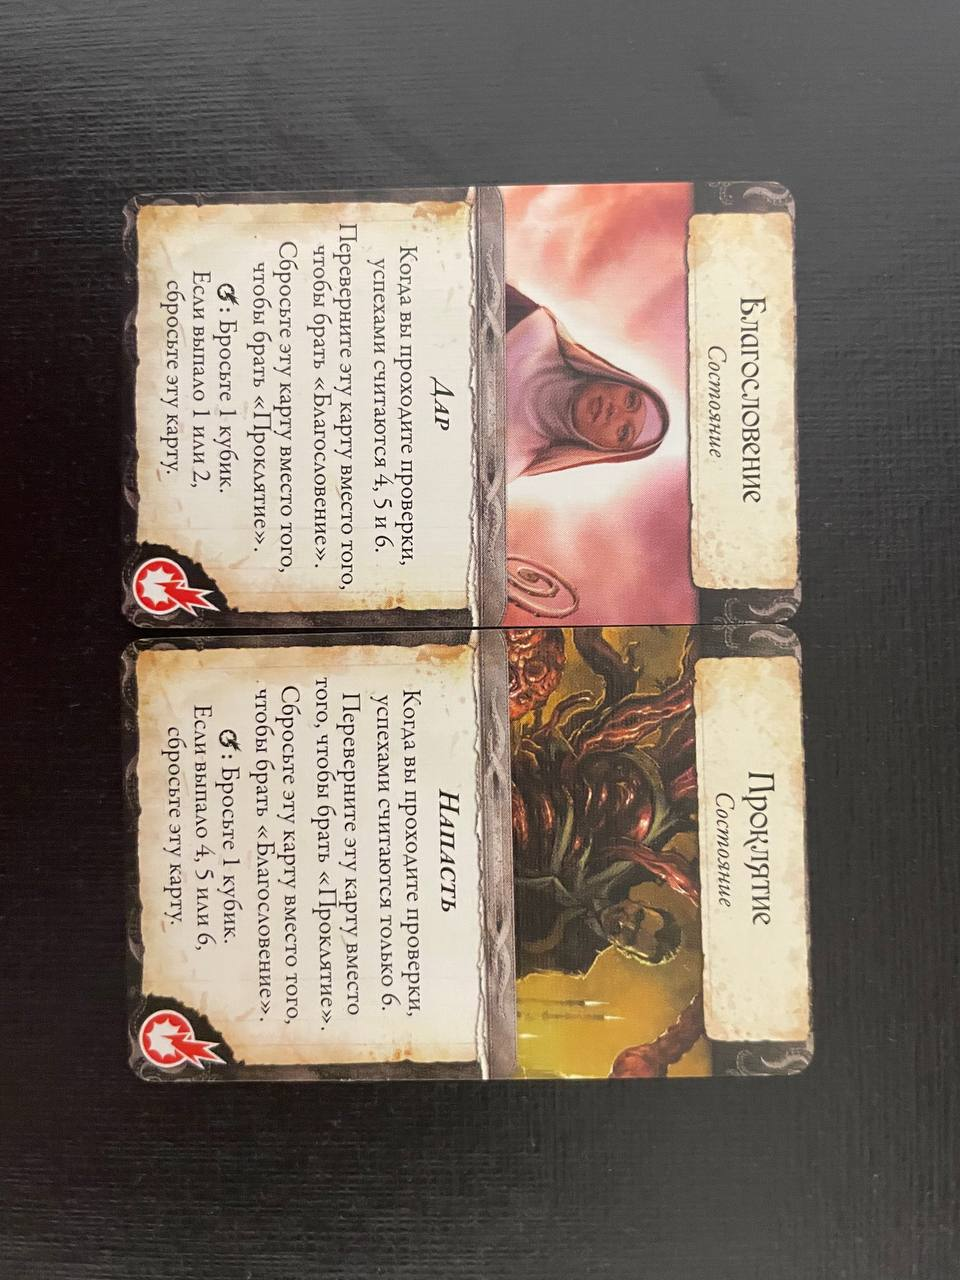

**Проверка в бою**
- Каждый враг также обладает характеристиками - это сила и воля, и устойчивость(необходимое количество успехов силы для победы над ним). В случае провала, по той или иной характеристики, ваш персонаж получает урон, равный недостающему значению врага физический(сила) и ментальный(воля).

**Пример. **

- Уильям Йорик обладает значением воли 3 и силой равной 3.
- Наш монстр значение воли 2 и силой равной 1.

Для того чтобы не получить ментальный урон Уильяму необходимо выбросить минимум 2 успеха(5 или 6) из 3 кубиков на волю и 1 успех на силу(также 5 и 6) для того чтобы не получить физический урон, но из-за модификаторы монстра у нас лишь 2 кубика при броске силы.

**Победа**

Наш храбрый могильщик победит монстра, если количество успехов силы на кубиках будет равно его устойчивости (2).

Мы бросили 3 кубика на волю и получили 1 успех, к сожалению, мы получаем единицу ментального урона, но всё же продолжаем бой. И вновь мы бросаем 2(т.к -1) кубика на силу, невероятно но нам выпадает 2 успеха из 2 возможных, мы не получаем урон и наносим монстру урон в размере 2-х, враг повержен.


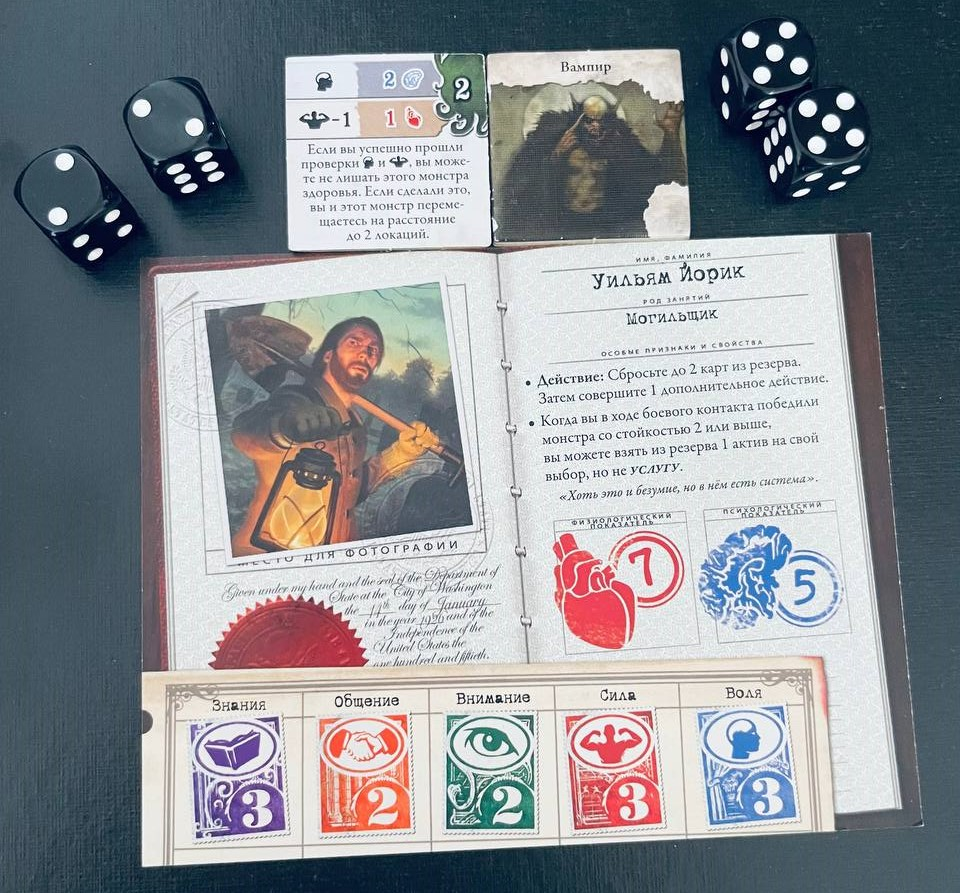

**Задача**

Написать функцию, которая показывает вероятность успешно пройденной проверки. На вход подаются такие параметры:

- Количество кубиков доступных для броска,
- Модификатор (благословение или проклятие) или его отсутствие,
- Необходимое количество успехов для прохождения.

Также для удобства использования будет реализован телеграмм бот.

Приступим...

Импорт необходимых библиотек:

- Math, для проведения математических операций,
- Itertools, для создания комбинаций,
- tqdm индикатор выполнения(для удобства),
- pandas для работы с датафреймом,


In [2]:
import math
import itertools
from tqdm import tqdm
import pandas as pd

В любом случае, мы будем использовать классическое определение вероятности. А именно..

Вероятностью P(A) события A называется отношение числа элементарных событий m, благоприятствующих событию A, к числу всех элементарных событий n.

То есть нам необходимо найти:

- Общее число исходов,
- Число исходов благоприятных событию A. Где событие A, непосредственно выпадение 5 или 6, не учитывая модификатор.

В функции ниже осуществляется проверка на выброс 1 успеха:
Общее число исходов - это возведение 6 (граней) в степень количества кубиков.
В качестве комбинаций, это не всевозможные комбинации, а вероятности.
То есть, не имея модификатора, успех это 5,6 или 2/6, вероятность же провала равна 4/6, если мы имеем 2 кубика, возможные исходы:
- Успех, успех (2/6 и 2/6),
- Провал, провал (4/6 и 4/6),
- Успех, провал (2/6 и 4/6),
- Провал, успех (4/6 и 2/6)

Ниже представлено немного иначе, касательно записи, но логический смысл сохранен.

Вот только есть одно но, данная функция решает задачу для проверки навыка (1 успех). Ситуация в бою иная, обычно необходимо выбросить более 1 успеха для победы над врагом.



In [ ]:
# вероятность.
def arkham (cubes, modifier=None):
  success = [5,6]
  space = 6**cubes
  result = 0
  if (modifier == 'blessing'):
    success.append(4)
  elif(modifier == 'curse'):
    success.remove(5)
  fail = 6 - len(success)
  comb = list(itertools.product([len(success),fail], repeat=cubes))
  result= (space - math.prod(comb[len(comb)-1]))/space
  return result

In [ ]:
arkham(2)

0.5555555555555556

In [ ]:
arkham(2, modifier="curse")

0.3055555555555556

In [ ]:
arkham(2, modifier="blessing")

0.75

По этой причине, рассмотрим другой вариант решения задачи, а именно через запись всевозможных комбинаций, и подсчёте благоприятных исходов. Теперь, функция принимает на вход такой параметр как score, по умолчанию он равен 1, но мы можем задать любое значение, в том числе и большее чем количество кубиков на руках, в этом случае соответствующая вероятность победы - 0.

In [ ]:
#комбинации
def arkham_c (cubes, modifier=None, score=1):
  success = ['5','6']
  comb_space = list(itertools.product('123456', repeat=cubes))
  list_space = []
  success_comb = 0
  if (modifier == 'blessing'):
    success.append('4')
  elif(modifier == 'curse'):
    success.remove('5')
  for i in comb_space:
    list_space.append(list(i))
  for i in range(len(list_space)):
    list_space[i] = [1 if x in success else 0 for x in list_space[i]]
  for i in list_space:
    if(sum(i) >= score):
      success_comb+=1
  return success_comb/len(comb_space)

In [ ]:
arkham_c(2)

0.5555555555555556

In [ ]:
arkham_c(2, modifier="curse")

0.3055555555555556

In [ ]:
arkham_c(2, modifier="blessing")

0.75

In [ ]:
arkham_c(3,score=2)

0.25925925925925924

In [ ]:
arkham_c(3,score=4)

0.0

In [ ]:
res = []
for n in tqdm(range(1, 10)):
  for m in tqdm(["blessing", "curse", None]):
    for s in range(1, 10):
      if s <= n:
        res.append([n, s, m, arkham_c(cubes=n, modifier=m, score=s)])

100%|██████████| 3/3 [00:00<00:00, 17026.94it/s]

100%|██████████| 3/3 [00:00<00:00, 1580.57it/s]

100%|██████████| 3/3 [00:00<00:00, 898.33it/s]

100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

100%|██████████| 9/9 [17:19<00:00, 115.51s/it]


In [ ]:
pd.DataFrame(res, columns=['cubes','score', 'modifier', 'prob']).to_csv('arkham.csv', index=False)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/arkham.csv")

In [ ]:
# просмотр результативного датафрейма
df

,cubes,score,modifier,prob
0,1,1,blessing,0.500000
1,1,1,curse,0.166667
2,1,1,NaN,0.333333
3,2,1,blessing,0.750000
4,2,2,blessing,0.250000
...,...,...,...,...
130,9,5,NaN,0.144846
131,9,6,NaN,0.042422
132,9,7,NaN,0.008281
133,9,8,NaN,0.000965


In [12]:
# вероятность взависимости от необходимого количества успехов и количества имеющихся кубиков на руках, с модификатором проклятие
df_curse = pd.pivot_table(df[df['modifier'] == 'curse'], columns='cubes', index='score', values='prob').style.background_gradient(cmap='PuBu', axis=1)
df_curse

cubes,1,2,3,4,5,6,7,8,9
score,,,,,,,,,
1,0.166667,0.305556,0.421296,0.517747,0.598122,0.665102,0.720918,0.767432,0.806193
2,nan,0.027778,0.074074,0.131944,0.196245,0.263224,0.330204,0.395323,0.457341
3,nan,nan,0.004630,0.016204,0.035494,0.062286,0.095775,0.134847,0.178260
4,nan,nan,nan,0.000772,0.003344,0.008702,0.017633,0.030656,0.048021
5,nan,nan,nan,nan,0.000129,0.000664,0.002004,0.004609,0.008950
6,nan,nan,nan,nan,nan,0.000021,0.000129,0.000441,0.001136
7,nan,nan,nan,nan,nan,nan,0.000004,0.000024,0.000094
8,nan,nan,nan,nan,nan,nan,nan,0.000001,0.000005
9,nan,nan,nan,nan,nan,nan,nan,nan,0.000000


In [10]:
# с модификатором благословение
df_blessing = pd.pivot_table(df[df['modifier'] == 'blessing'], columns='cubes', index='score', values='prob').style.background_gradient(cmap='PuBu', axis=1)
df_blessing

cubes,1,2,3,4,5,6,7,8,9
score,,,,,,,,,
1,0.500000,0.750000,0.875000,0.937500,0.968750,0.984375,0.992188,0.996094,0.998047
2,nan,0.250000,0.500000,0.687500,0.812500,0.890625,0.937500,0.964844,0.980469
3,nan,nan,0.125000,0.312500,0.500000,0.656250,0.773438,0.855469,0.910156
4,nan,nan,nan,0.062500,0.187500,0.343750,0.500000,0.636719,0.746094
5,nan,nan,nan,nan,0.031250,0.109375,0.226562,0.363281,0.500000
6,nan,nan,nan,nan,nan,0.015625,0.062500,0.144531,0.253906
7,nan,nan,nan,nan,nan,nan,0.007812,0.035156,0.089844
8,nan,nan,nan,nan,nan,nan,nan,0.003906,0.019531
9,nan,nan,nan,nan,nan,nan,nan,nan,0.001953


In [11]:
# без модификатора
df_none = pd.pivot_table(df[df['modifier'].isna()], columns='cubes', index='score', values='prob').style.background_gradient(cmap='PuBu', axis=1)
df_none

cubes,1,2,3,4,5,6,7,8,9
score,,,,,,,,,
1,0.333333,0.555556,0.703704,0.802469,0.868313,0.912209,0.941472,0.960982,0.973988
2,nan,0.111111,0.259259,0.407407,0.539095,0.648834,0.736626,0.804908,0.856932
3,nan,nan,0.037037,0.111111,0.209877,0.319616,0.429355,0.531779,0.622822
4,nan,nan,nan,0.012346,0.045267,0.100137,0.173297,0.258650,0.349693
5,nan,nan,nan,nan,0.004115,0.017833,0.045267,0.087944,0.144846
6,nan,nan,nan,nan,nan,0.001372,0.006859,0.019662,0.042422
7,nan,nan,nan,nan,nan,nan,0.000457,0.002591,0.008281
8,nan,nan,nan,nan,nan,nan,nan,0.000152,0.000965
9,nan,nan,nan,nan,nan,nan,nan,nan,0.000051


In [ ]:
# установка библиотек для создания и работы с ботом
!pip install python-telegram-bot --upgrade
!pip install pyTelegramBotAPI

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive')

In [ ]:
import telebot
import tok

# Создаем экземпляр бота
bot = telebot.TeleBot(tok.f())

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, "Привет! Я бот для подсчета вероятности прохождения проверки. Отправь мне через пробел:\
                                                                                        - кол-во кубиков, \
                                                                                        - количество необходимых успехов, \
                                                                                        - модификатор, \
                                                                                        где проклятие - curse, благословение blessing, no - нет")

@bot.message_handler(func=lambda message: True)
def calculate_probability_handler(message):
    try:
        num1, num2, modifier = message.text.split()
        cubes = int(num1)
        score = int(num2)
        modifier = modifier.lower()

        probability = arkham_c (cubes, modifier, score)

        bot.reply_to(message, f"Вероятность прохождения проверки равна {probability}")

    except Exception as e:
        bot.reply_to(message, "Ошибка! Введите два числа и модификатор через пробел.")

bot.polling()

# Запускаем бота
bot.polling()